In [1]:
import numpy as np
from src.vae_model import vae_model
from src.visualization import plot_loss_history, plot_voxel, plot_latent_space_with_tsne
from src.voxel_util import random_voxel_ball, gen_voxel_data
from tensorflow.keras.optimizers import Adam

2023-12-21 09:57:18.669393: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 09:57:18.669540: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 09:57:18.670375: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 09:57:18.758757: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


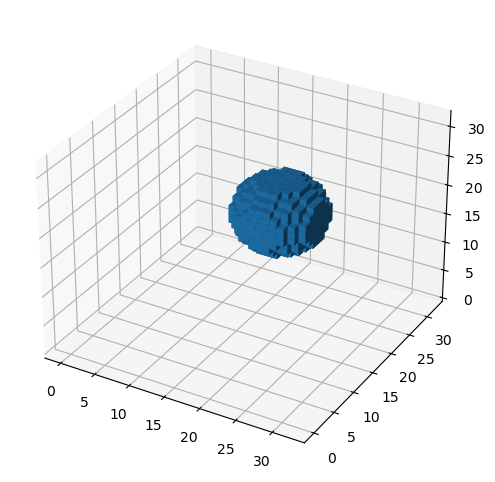

In [40]:
d = 6
plot_voxel(random_voxel_ball(d=d))

In [3]:
gamma_train = gen_voxel_data(num=20_000, d=d)
gamma_train = gamma_train / 15
print(gamma_train.shape)

(20000, 32, 32, 32, 1)


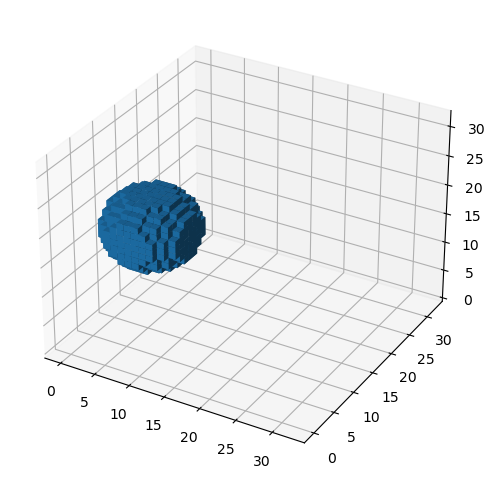

In [6]:
plot_voxel(gamma_train[11,:,:,:,0])

In [26]:
filters = [1, 2, 4, 8]
kernels = [(4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4)]
strides = [(1, 1, 1), (2, 2, 2), (2, 2, 2), (2, 2, 2)]
paddings = ["same", "same", "same", "same"]

latent_dim = 128

vae = vae_model(
    input_shape=(32, 32, 32, 1),
    filters=filters,
    kernels=kernels,
    strides=strides,
    paddings=paddings,
    latent_dim=latent_dim,
)
vae.compile(optimizer=Adam())

In [27]:
epoch_num = 50
batch_size = 256

history = vae.fit(gamma_train, epochs=epoch_num, batch_size=batch_size)
# callbacks = [LearningRateScheduler(learning_rate_scheduler)]

Epoch 1/50
79/79 [==============================] - 10s 45ms/step - loss: 5.5363 - reconstruction_loss: 4.6281 - kl_loss: 0.0251
Epoch 2/50
79/79 [==============================] - 4s 47ms/step - loss: 4.0343 - reconstruction_loss: 3.9922 - kl_loss: 0.0027
Epoch 3/50
79/79 [==============================] - 4s 45ms/step - loss: 3.8791 - reconstruction_loss: 3.8273 - kl_loss: 0.0011
Epoch 4/50
79/79 [==============================] - 4s 45ms/step - loss: 3.5885 - reconstruction_loss: 3.5500 - kl_loss: 7.3105e-04
Epoch 5/50
79/79 [==============================] - 4s 45ms/step - loss: 3.4903 - reconstruction_loss: 3.4852 - kl_loss: 4.4719e-04
Epoch 6/50
79/79 [==============================] - 4s 45ms/step - loss: 3.4690 - reconstruction_loss: 3.4659 - kl_loss: 3.3066e-04
Epoch 7/50
79/79 [==============================] - 4s 45ms/step - loss: 3.4597 - reconstruction_loss: 3.4552 - kl_loss: 2.7991e-04
Epoch 8/50
79/79 [==============================] - 4s 45ms/step - loss: 3.4567 - recon

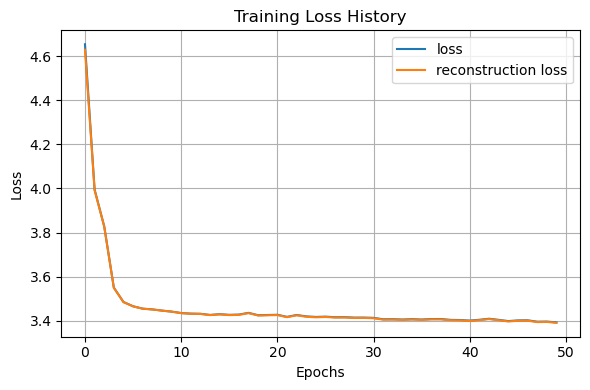

In [28]:
plot_loss_history(history)

In [41]:
gamma_test = gen_voxel_data(num=100, d=d)
gamma_test = gamma_test / 15

In [42]:
gamma_test.shape

(100, 32, 32, 32, 1)

4/4 [==============================] - 0s 4ms/step


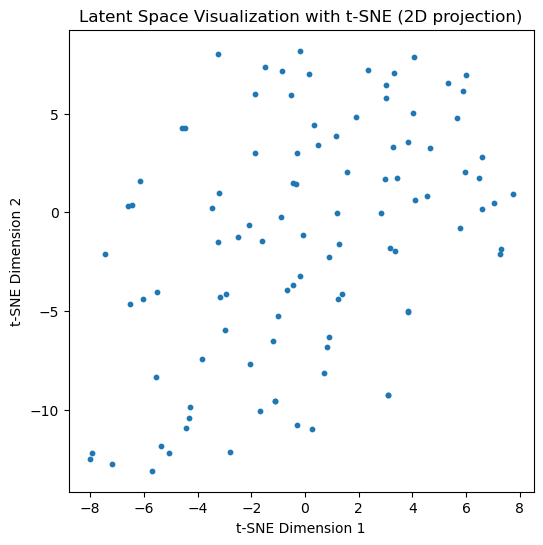

In [43]:
z_mean, z_log_var, z = vae.encoder.predict(gamma_test)
plot_latent_space_with_tsne(z_log_var)

In [44]:
gamma_preds = vae.decoder.predict(np.random.randn(100, 128)) * 15

4/4 [==============================] - 0s 2ms/step


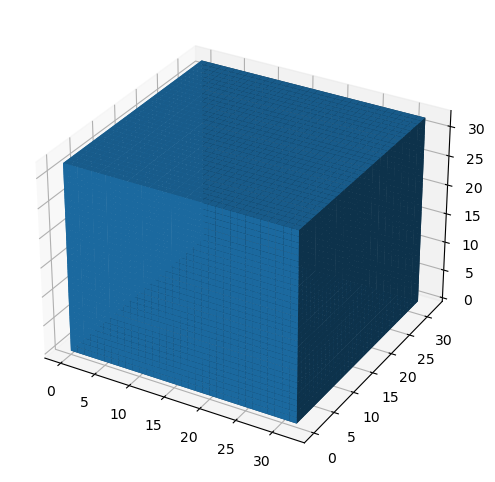

In [45]:
ns = 100
for idx in np.random.randint(0,ns, size=1):
    plot_voxel(np.squeeze(gamma_preds, axis=4)[idx,...])

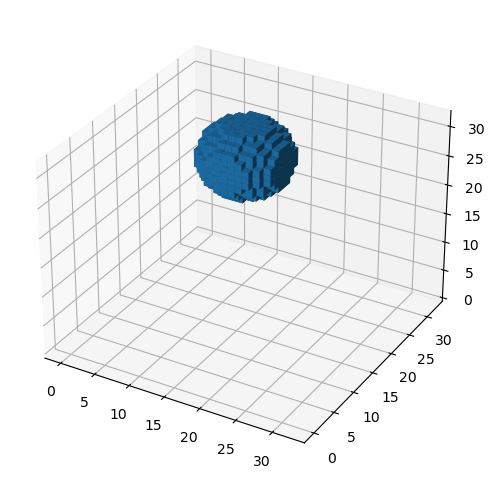

1/1 [==============================] - 0s 20ms/step


In [46]:
sgl_data = gen_voxel_data(1,d=d) / 15
plot_voxel(sgl_data[0,:,:,:,0])
z_mean, z_log_var, z = vae.encoder.predict(gen_voxel_data(1))

1/1 [==============================] - 0s 34ms/step


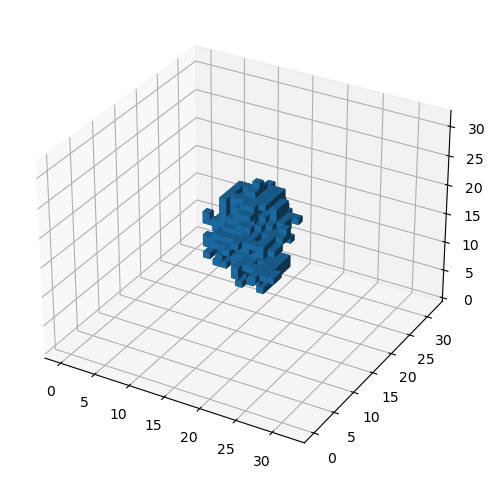

In [53]:
sgl_pred = vae.decoder.predict(z)*15
sgl_pred = np.squeeze(sgl_pred, axis=4)
sgl_pred = np.squeeze(sgl_pred, axis=0)
#sgl_pred = np.abs(np.round(sgl_pred))

plot_voxel(sgl_pred)